In [1]:
import numpy as np # Numpy to handle numbers
import pandas as pd  #Pandas to handle csv file and the data in it
import matplotlib.pyplot as plt #To plot graphs and enable charts and graphs
%matplotlib inline
import datetime
import seaborn as sns #Python data visualization library
sns.set()

from sklearn.model_selection import TimeSeriesSplit

from scipy.stats import boxcox #Statistical tool to get to know the Central Tendency Range
from os import listdir

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
data = pd.read_csv(r"C:\Users\My\Desktop\daily_data_updated.csv", encoding="ISO-8859-1", dtype={'CustomerID': str})
data.shape     #iso 8601 format for date format

(184513, 12)

In [3]:
data

,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,UnitPrice,StockCode,Quantity,Revenue
0,2010-12-01,2010,4,12,48,2,335,1,0.12,20668,48,5.76
1,2010-12-01,2010,4,12,48,2,335,1,0.21,16237,60,12.60
2,2010-12-01,2010,4,12,48,2,335,1,0.21,16238,28,5.88
3,2010-12-01,2010,4,12,48,2,335,1,0.21,17003,36,7.56
4,2010-12-01,2010,4,12,48,2,335,1,0.29,21980,37,10.73
...,...,...,...,...,...,...,...,...,...,...,...,...
184508,2011-12-09,2011,4,12,49,4,343,9,9.95,23463,2,19.90
184509,2011-12-09,2011,4,12,49,4,343,9,10.95,21258,8,87.60
184510,2011-12-09,2011,4,12,49,4,343,9,10.95,22485,12,131.40
184511,2011-12-09,2011,4,12,49,4,343,9,12.75,22423,10,127.50


In [4]:
#import pandas_profiling as pp

In [5]:
#pp.ProfileReport(daily_data)

In [6]:
data.dtypes

Date          object
Year           int64
Quarter        int64
Month          int64
Week           int64
Weekday        int64
Dayofyear      int64
Day            int64
UnitPrice    float64
StockCode      int64
Quantity       int64
Revenue      float64
dtype: object

In [7]:
y = data.Quantity
X = data.drop(['Quantity'], axis=1).select_dtypes(exclude=['object'])

In [8]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

In [9]:
X_train

,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,UnitPrice,StockCode,Revenue
0,2010,4,12,48,2,335,1,0.12,20668,5.76
1,2010,4,12,48,2,335,1,0.21,16237,12.60
2,2010,4,12,48,2,335,1,0.21,16238,5.88
3,2010,4,12,48,2,335,1,0.21,17003,7.56
4,2010,4,12,48,2,335,1,0.29,21980,10.73
...,...,...,...,...,...,...,...,...,...,...
129154,2011,3,9,39,3,272,29,3.75,23402,33.75
129155,2011,3,9,39,3,272,29,3.75,23403,15.00
129156,2011,3,9,39,3,272,29,3.75,23516,22.50
129157,2011,3,9,39,3,272,29,3.75,23519,22.50


In [10]:
X_test

,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,UnitPrice,StockCode,Revenue
129159,2011,3,9,39,3,272,29,3.75,71053,3.75
129160,2011,3,9,39,3,272,29,3.95,22188,15.80
129161,2011,3,9,39,3,272,29,3.95,22189,47.40
129162,2011,3,9,39,3,272,29,3.95,23012,31.60
129163,2011,3,9,39,3,272,29,3.95,23013,39.50
...,...,...,...,...,...,...,...,...,...,...
184508,2011,4,12,49,4,343,9,9.95,23463,19.90
184509,2011,4,12,49,4,343,9,10.95,21258,87.60
184510,2011,4,12,49,4,343,9,10.95,22485,131.40
184511,2011,4,12,49,4,343,9,12.75,22423,127.50


In [28]:
y_train

0         48
1         60
2         28
3         36
4         37
          ..
129154     9
129155     4
129156     6
129157     6
129158     6
Name: Quantity, Length: 129159, dtype: int64

In [29]:
#Linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [30]:
sales_pred = lin_reg.predict(X_test)

In [31]:
p=sales_pred.reshape(-1,1)

In [33]:
y_test

129159     1
129160     4
129161    12
129162     8
129163    10
          ..
184508     2
184509     8
184510    12
184511    10
184512     4
Name: Quantity, Length: 55354, dtype: int64

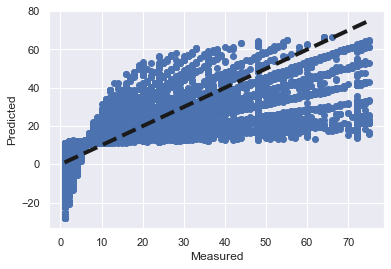

In [35]:
fig, ax = plt.subplots()
ax.scatter(y_test, sales_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [36]:
print(y_test)
print(p)

129159     1
129160     4
129161    12
129162     8
129163    10
          ..
184508     2
184509     8
184510    12
184511    10
184512     4
Name: Quantity, Length: 55354, dtype: int64
[[ 4.55288495]
 [ 7.93193436]
 [19.58618455]
 ...
 [34.30328039]
 [28.68858588]
 [ 1.24558508]]


In [38]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': sales_pred})
df

,Actual,Predicted
129159,1,4.552885
129160,4,7.931934
129161,12,19.586185
129162,8,13.769189
129163,10,16.682761
...,...,...
184508,2,-4.486673
184509,8,18.134528
184510,12,34.303280
184511,10,28.688586


In [41]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, sales_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, sales_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, sales_pred)))

Mean Absolute Error: 6.759176980344731
Mean Squared Error: 87.01441102988305
Root Mean Squared Error: 9.32815153338983


In [42]:
X_test

,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,UnitPrice,StockCode,Revenue
129159,2011,3,9,39,3,272,29,3.75,71053,3.75
129160,2011,3,9,39,3,272,29,3.95,22188,15.80
129161,2011,3,9,39,3,272,29,3.95,22189,47.40
129162,2011,3,9,39,3,272,29,3.95,23012,31.60
129163,2011,3,9,39,3,272,29,3.95,23013,39.50
...,...,...,...,...,...,...,...,...,...,...
184508,2011,4,12,49,4,343,9,9.95,23463,19.90
184509,2011,4,12,49,4,343,9,10.95,21258,87.60
184510,2011,4,12,49,4,343,9,10.95,22485,131.40
184511,2011,4,12,49,4,343,9,12.75,22423,127.50


In [44]:
df1=df.drop(['Actual'],axis=1)
df1

,Predicted
129159,4.552885
129160,7.931934
129161,19.586185
129162,13.769189
129163,16.682761
...,...
184508,-4.486673
184509,18.134528
184510,34.303280
184511,28.688586


# Merging the predicted values with the original dataset.

In [45]:
df4=pd.merge(X_test, df, left_index=True, right_index=True)

In [46]:
df4

,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,UnitPrice,StockCode,Revenue,Actual,Predicted
129159,2011,3,9,39,3,272,29,3.75,71053,3.75,1,4.552885
129160,2011,3,9,39,3,272,29,3.95,22188,15.80,4,7.931934
129161,2011,3,9,39,3,272,29,3.95,22189,47.40,12,19.586185
129162,2011,3,9,39,3,272,29,3.95,23012,31.60,8,13.769189
129163,2011,3,9,39,3,272,29,3.95,23013,39.50,10,16.682761
...,...,...,...,...,...,...,...,...,...,...,...,...
184508,2011,4,12,49,4,343,9,9.95,23463,19.90,2,-4.486673
184509,2011,4,12,49,4,343,9,10.95,21258,87.60,8,18.134528
184510,2011,4,12,49,4,343,9,10.95,22485,131.40,12,34.303280
184511,2011,4,12,49,4,343,9,12.75,22423,127.50,10,28.688586


In [48]:
df4["PredictedRevenue"] = df4.Predicted * df4.UnitPrice
df4

,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,UnitPrice,StockCode,Revenue,Actual,Predicted,PredictedRevenue
129159,2011,3,9,39,3,272,29,3.75,71053,3.75,1,4.552885,17.073319
129160,2011,3,9,39,3,272,29,3.95,22188,15.80,4,7.931934,31.331141
129161,2011,3,9,39,3,272,29,3.95,22189,47.40,12,19.586185,77.365429
129162,2011,3,9,39,3,272,29,3.95,23012,31.60,8,13.769189,54.388298
129163,2011,3,9,39,3,272,29,3.95,23013,39.50,10,16.682761,65.896907
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184508,2011,4,12,49,4,343,9,9.95,23463,19.90,2,-4.486673,-44.642393
184509,2011,4,12,49,4,343,9,10.95,21258,87.60,8,18.134528,198.573082
184510,2011,4,12,49,4,343,9,10.95,22485,131.40,12,34.303280,375.620920
184511,2011,4,12,49,4,343,9,12.75,22423,127.50,10,28.688586,365.779470


# Below is the list of top 10 products which will be giving highest revenue next week in the country United kingdom with tenative quatity required for the week 40.

In [51]:
df4.loc[df4.Week == 40].sort_values(by="PredictedRevenue", ascending=False).head(10)

,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,UnitPrice,StockCode,Revenue,Actual,Predicted,PredictedRevenue
133308,2011,4,10,40,2,278,5,9.95,21340,159.20,16,47.090638,468.551844
134272,2011,4,10,40,3,279,6,12.75,85066,140.25,11,34.227351,436.398726
132565,2011,4,10,40,1,277,4,9.95,22768,139.30,14,39.931954,397.322939
135627,2011,4,10,40,6,282,9,8.25,23284,140.25,17,43.417433,358.193824
133326,2011,4,10,40,2,278,5,12.50,23314,125.00,10,28.586367,357.329583
134265,2011,4,10,40,3,279,6,12.50,23314,125.00,10,28.423397,355.292464
132534,2011,4,10,40,1,277,4,8.25,23541,132.00,16,41.192801,339.840608
132476,2011,4,10,40,1,277,4,5.95,23356,160.65,27,57.092268,339.698992
132490,2011,4,10,40,1,277,4,6.35,20749,152.40,24,53.089648,337.119264
134189,2011,4,10,40,3,279,6,7.08,48116,141.60,20,47.423826,335.760687


In [52]:
next_week = df4.loc[df4.Week == 40].sort_values(by="PredictedRevenue", ascending=False).head(10)

In [53]:
next_week

,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,UnitPrice,StockCode,Revenue,Actual,Predicted,PredictedRevenue
133308,2011,4,10,40,2,278,5,9.95,21340,159.20,16,47.090638,468.551844
134272,2011,4,10,40,3,279,6,12.75,85066,140.25,11,34.227351,436.398726
132565,2011,4,10,40,1,277,4,9.95,22768,139.30,14,39.931954,397.322939
135627,2011,4,10,40,6,282,9,8.25,23284,140.25,17,43.417433,358.193824
133326,2011,4,10,40,2,278,5,12.50,23314,125.00,10,28.586367,357.329583
134265,2011,4,10,40,3,279,6,12.50,23314,125.00,10,28.423397,355.292464
132534,2011,4,10,40,1,277,4,8.25,23541,132.00,16,41.192801,339.840608
132476,2011,4,10,40,1,277,4,5.95,23356,160.65,27,57.092268,339.698992
132490,2011,4,10,40,1,277,4,6.35,20749,152.40,24,53.089648,337.119264
134189,2011,4,10,40,3,279,6,7.08,48116,141.60,20,47.423826,335.760687


In [55]:
next_week.Predicted.sum()      # sum of predicted quantity

420.4756815290789

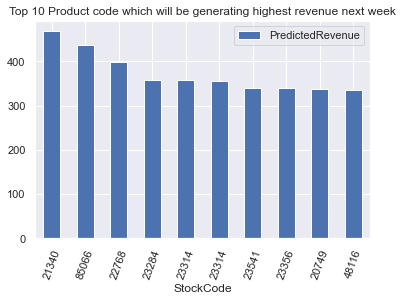

In [56]:
next_week.plot.bar(x="StockCode", y="PredictedRevenue", rot=70, title="Top 10 Product code which will be generating highest revenue next week");

plt.show(block=True);

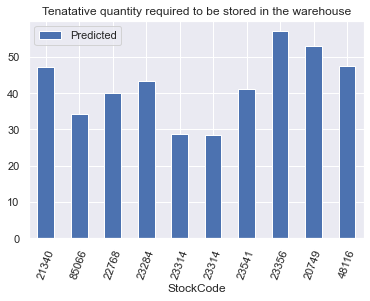

In [57]:
next_week.plot.bar(x="StockCode", y="Predicted", rot=70, title="Tenatative quantity required to be stored in the warehouse");

plt.show(block=True);

# Similarly, we can predict for any upcoming week/day/month just by changing the values and retailer can store only those items in the warehouse which will give the best revenue as storge area is expensive and by making the predictionthrough country wise assuming that one warehouse in one country , we can significantly reduce the delivery time by knowing the item which will be in demand in future.                                                                                                    It will also increase the revenue as the item will not be out of stock in the future.                                                                                                                             Different models can be tried for better predictions.                                                 Thank You for reaching till here.